In [ ]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import numpy
import math

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stock data/stock data.csv", parse_dates = ['date'])  # load stock data

In [ ]:
df

,PERMNO,date,PRIMEXCH,PERMCO,PRC,RET,SHROUT
0,10001,1990-01-31,Q,7953,-9.93750,-0.018519,1022.0
1,10001,1990-02-28,Q,7953,-9.87500,-0.006289,1022.0
2,10001,1990-03-30,Q,7953,-9.87500,0.012658,1027.0
3,10001,1990-04-30,Q,7953,-9.87500,0.000000,1027.0
4,10001,1990-05-31,Q,7953,9.75000,-0.012658,1027.0
...,...,...,...,...,...,...,...
2558000,93436,2020-08-31,Q,53453,498.32001,0.741452,931809.0
2558001,93436,2020-09-30,Q,53453,429.01001,-0.139087,948000.0
2558002,93436,2020-10-30,Q,53453,388.04001,-0.095499,947901.0
2558003,93436,2020-11-30,Q,53453,567.59998,0.462736,947901.0


In [ ]:
df = df.drop(["PERMCO", "PRIMEXCH"], axis = 1)

In [ ]:
df.info() #screen the data and check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558005 entries, 0 to 2558004
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PERMNO  int64         
 1   date    datetime64[ns]
 2   PRC     float64       
 3   RET     object        
 4   SHROUT  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 97.6+ MB


In [ ]:
print(df.RET.value_counts())  # check the values of RET (cannot convert the type to float)

0.000000     64358
C            17314
-0.125000     4800
-0.166667     4700
-0.200000     4660
             ...  
-0.341591        1
-0.234082        1
0.347346         1
-0.167225        1
0.695568         1
Name: RET, Length: 427505, dtype: int64


In [ ]:
df = df[df.RET!="C"] # remove observations with invalid data

In [ ]:
df.RET = df.RET.astype("float") # change type to float for calculations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540691 entries, 0 to 2558004
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PERMNO  int64         
 1   date    datetime64[ns]
 2   PRC     float64       
 3   RET     float64       
 4   SHROUT  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 116.3 MB


In [ ]:
df.isnull().sum()

PERMNO        0
date          0
PRC       19016
RET       19016
SHROUT     2494
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

PERMNO    0
date      0
PRC       0
RET       0
SHROUT    0
dtype: int64

In [ ]:
df.PERMNO.nunique()

23416

In [ ]:
df = df.sort_values(["PERMNO", "date"])
df

,PERMNO,date,PRC,RET,SHROUT
0,10001,1990-01-31,-9.93750,-0.018519,1022.0
1,10001,1990-02-28,-9.87500,-0.006289,1022.0
2,10001,1990-03-30,-9.87500,0.012658,1027.0
3,10001,1990-04-30,-9.87500,0.000000,1027.0
4,10001,1990-05-31,9.75000,-0.012658,1027.0
...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0
2558003,93436,2020-11-30,567.59998,0.462736,947901.0


In [ ]:
df['PRC'] = df['PRC'].abs() # for negative prices, which are actually positive according to CRSP

In [ ]:
df["MarketCap"] = df.PRC * df.SHROUT
df

,PERMNO,date,PRC,RET,SHROUT,MarketCap
0,10001,1990-01-31,9.93750,-0.018519,1022.0,1.015612e+04
1,10001,1990-02-28,9.87500,-0.006289,1022.0,1.009225e+04
2,10001,1990-03-30,9.87500,0.012658,1027.0,1.014162e+04
3,10001,1990-04-30,9.87500,0.000000,1027.0,1.014162e+04
4,10001,1990-05-31,9.75000,-0.012658,1027.0,1.001325e+04
...,...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0,4.643391e+08
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0,4.067015e+08
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0,3.678235e+08
2558003,93436,2020-11-30,567.59998,0.462736,947901.0,5.380286e+08


In [ ]:
#lagged market cap (we will later remove first ocurrences of stocks)

df["MarketCap"] = df.MarketCap.shift(1)

df

,PERMNO,date,PRC,RET,SHROUT,MarketCap
0,10001,1990-01-31,9.93750,-0.018519,1022.0,NaN
1,10001,1990-02-28,9.87500,-0.006289,1022.0,1.015612e+04
2,10001,1990-03-30,9.87500,0.012658,1027.0,1.009225e+04
3,10001,1990-04-30,9.87500,0.000000,1027.0,1.014162e+04
4,10001,1990-05-31,9.75000,-0.012658,1027.0,1.014162e+04
...,...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0,2.666393e+08
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0,4.643391e+08
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0,4.067015e+08
2558003,93436,2020-11-30,567.59998,0.462736,947901.0,3.678235e+08


In [ ]:
df.isnull().sum()

PERMNO       0
date         0
PRC          0
RET          0
SHROUT       0
MarketCap    1
dtype: int64

In [ ]:
df["cum_ret"] = numpy.nan # create cumulative return column

In [ ]:
for p in df.PERMNO.unique():
  df.loc[df["PERMNO"] == p, "cum_ret" ] = (1+df.loc[df.PERMNO==p, "RET"]).rolling(12).apply(numpy.prod, raw=True)-1

In [ ]:
df

,PERMNO,date,PRC,RET,SHROUT,MarketCap,cum_ret
0,10001,1990-01-31,9.93750,-0.018519,1022.0,NaN,NaN
1,10001,1990-02-28,9.87500,-0.006289,1022.0,1.015612e+04,NaN
2,10001,1990-03-30,9.87500,0.012658,1027.0,1.009225e+04,NaN
3,10001,1990-04-30,9.87500,0.000000,1027.0,1.014162e+04,NaN
4,10001,1990-05-31,9.75000,-0.012658,1027.0,1.014162e+04,NaN
...,...,...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0,2.666393e+08,10.043838
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0,4.643391e+08,7.905430
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0,4.067015e+08,5.160933
2558003,93436,2020-11-30,567.59998,0.462736,947901.0,3.678235e+08,7.601567


In [ ]:
df.isnull().sum()

PERMNO            0
date              0
PRC               0
RET               0
SHROUT            0
MarketCap         1
cum_ret      250264
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df

,PERMNO,date,PRC,RET,SHROUT,MarketCap,cum_ret
11,10001,1990-12-31,9.50000,0.001299,1054.0,1.004850e+04,-0.008721
12,10001,1991-01-31,9.62500,0.013158,1054.0,1.001300e+04,0.023272
13,10001,1991-02-28,9.75000,0.012987,1054.0,1.014475e+04,0.043121
14,10001,1991-03-28,9.50000,-0.011538,1054.0,1.027650e+04,0.018198
15,10001,1991-04-30,9.87500,0.039474,1054.0,1.001300e+04,0.058390
...,...,...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0,2.666393e+08,10.043838
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0,4.643391e+08,7.905430
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0,4.067015e+08,5.160933
2558003,93436,2020-11-30,567.59998,0.462736,947901.0,3.678235e+08,7.601567


In [ ]:
df.describe()

,PERMNO,PRC,RET,SHROUT,MarketCap,cum_ret
count,2.271411e+06,2.271411e+06,2.271411e+06,2.271411e+06,2.271411e+06,2.271411e+06
mean,6.479672e+04,4.112692e+01,1.237360e-02,7.587212e+04,2.716877e+06,1.373456e-01
std,2.775361e+04,1.859260e+03,1.844764e-01,3.147079e+05,1.617206e+07,9.135406e-01
min,1.000100e+04,7.800000e-03,-9.936000e-01,0.000000e+00,0.000000e+00,-9.999961e-01
25%,4.603400e+04,5.500000e+00,-5.857350e-02,7.259000e+03,4.939500e+04,-2.051380e-01
50%,7.766300e+04,1.372000e+01,3.726000e-03,1.920700e+04,2.065560e+05,5.321724e-02
75%,8.551100e+04,2.725000e+01,6.573300e-02,5.110200e+04,9.545152e+05,3.069700e-01
max,9.343600e+04,3.478150e+05,2.400000e+01,2.920640e+07,2.206911e+09,5.187504e+02


In [ ]:
df["cum_ret"] = df.cum_ret.shift(1)

In [ ]:
df

,PERMNO,date,PRC,RET,SHROUT,MarketCap,cum_ret
11,10001,1990-12-31,9.50000,0.001299,1054.0,1.004850e+04,NaN
12,10001,1991-01-31,9.62500,0.013158,1054.0,1.001300e+04,-0.008721
13,10001,1991-02-28,9.75000,0.012987,1054.0,1.014475e+04,0.023272
14,10001,1991-03-28,9.50000,-0.011538,1054.0,1.027650e+04,0.043121
15,10001,1991-04-30,9.87500,0.039474,1054.0,1.001300e+04,0.018198
...,...,...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0,2.666393e+08,4.921779
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0,4.643391e+08,10.043838
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0,4.067015e+08,7.905430
2558003,93436,2020-11-30,567.59998,0.462736,947901.0,3.678235e+08,5.160933


In [ ]:
# find first occurrence of assets to remove those observations

indexes=[]

for i in df.PERMNO.unique():
    indexes.append(df.loc[df.PERMNO==i, "date"].idxmin())

In [ ]:
indexes

[11,
 343,
 621,
 693,
 722,
 853,
 921,
 1019,
 1207,
 1344,
 1415,
 1565,
 1606,
 1679,
 1708,
 2033,
 2408,
 2788,
 3160,
 3181,
 3349,
 3364,
 3538,
 3551,
 3694,
 3913,
 4027,
 4399,
 4462,
 4523,
 4641,
 4983,
 5051,
 5253,
 5332,
 5384,
 5494,
 5611,
 5654,
 5741,
 6114,
 6167,
 6260,
 6284,
 6359,
 6480,
 6529,
 6770,
 6833,
 7000,
 7052,
 7097,
 7148,
 7344,
 7399,
 7529,
 7712,
 7780,
 8030,
 8126,
 8190,
 8246,
 8525,
 8897,
 8958,
 9330,
 9526,
 9702,
 9939,
 10152,
 10253,
 10278,
 10432,
 10582,
 10602,
 10729,
 10878,
 10963,
 11078,
 11109,
 11184,
 11438,
 11810,
 11913,
 11992,
 12116,
 12362,
 12734,
 13055,
 13071,
 13222,
 13325,
 13399,
 13537,
 13554,
 13640,
 13771,
 13933,
 13980,
 14249,
 14283,
 14449,
 14473,
 14547,
 14586,
 14677,
 14707,
 14870,
 14980,
 15074,
 15413,
 15779,
 15807,
 15930,
 16029,
 16057,
 16196,
 16252,
 16382,
 16547,
 16569,
 16669,
 17042,
 17167,
 17212,
 17469,
 17841,
 17870,
 17893,
 18088,
 18166,
 18250,
 18347,
 18484,
 1859

In [ ]:
df.drop(indexes, inplace=True) # remove first occurrences of assets

In [ ]:
import pickle

df.to_pickle("/content/drive/MyDrive/stock data/df_cumulative.pkl")

In [ ]:
import pickle

df = pd.read_pickle("/content/drive/MyDrive/stock data/df_cumulative.pkl")

In [ ]:
mom_cut = ["M"+str(i) for i in range(10,0,-1)]

mom_cut

['M10', 'M9', 'M8', 'M7', 'M6', 'M5', 'M4', 'M3', 'M2', 'M1']

In [ ]:
 #group stocks by their momentum and assign a momentum category to each stock

for i in df.date.unique():
    
    df.loc[df.date==i, "Mom_Portfolio"] =  pd.qcut(df.loc[df.date==i, "cum_ret"], 10, labels=mom_cut)


In [ ]:

#label= ["P"+str(i) for i in range(1,11)] #portfolio names

#label

In [ ]:
#group data frame with size cut-off values and assign a portfolio category to each asset

#for i in df.date.unique():
    
 #   df.loc[df.date==i, "Size_Portfolio"] =  pd.qcut(df.loc[df.date==i, "MarketCap"], 10, labels=label)

In [ ]:
df

,PERMNO,date,PRC,RET,SHROUT,MarketCap,cum_ret,Mom_Portfolio
12,10001,1991-01-31,9.62500,0.013158,1054.0,1.001300e+04,-0.008721,M3
13,10001,1991-02-28,9.75000,0.012987,1054.0,1.014475e+04,0.023272,M4
14,10001,1991-03-28,9.50000,-0.011538,1054.0,1.027650e+04,0.043121,M4
15,10001,1991-04-30,9.87500,0.039474,1054.0,1.001300e+04,0.018198,M5
16,10001,1991-05-31,9.87500,0.000000,1054.0,1.040825e+04,0.058390,M5
...,...,...,...,...,...,...,...,...
2558000,93436,2020-08-31,498.32001,0.741452,931809.0,2.666393e+08,4.921779,M1
2558001,93436,2020-09-30,429.01001,-0.139087,948000.0,4.643391e+08,10.043838,M1
2558002,93436,2020-10-30,388.04001,-0.095499,947901.0,4.067015e+08,7.905430,M1
2558003,93436,2020-11-30,567.59998,0.462736,947901.0,3.678235e+08,5.160933,M1


In [ ]:
df.isnull().sum()

PERMNO           0
date             0
PRC              0
RET              0
SHROUT           0
MarketCap        0
cum_ret          0
Mom_Portfolio    0
dtype: int64

In [ ]:
end = dt.date(2020,12,31)
start = dt.date(1991,1,31)

In [ ]:
#Load size cut offs

ME = reader.DataReader("ME_Breakpoints", "famafrench", start, end)

ME = ME[0]

ME.drop("Count", axis = 1, inplace=True)

ME.drop(ME.columns[[0,2,4,6,8,10,12,14,16,18]], axis=1, inplace = True) #drop every other 5th percentile and leave deciles

ME

,"(5, 10)","(15, 20)","(25, 30)","(35, 40)","(45, 50)","(55, 60)","(65, 70)","(75, 80)","(85, 90)","(95, 100)"
Date,,,,,,,,,,
1991-01,33.41,74.37,151.15,241.21,426.34,697.29,1148.81,2070.47,4650.04,72380.97
1991-02,37.62,85.58,167.51,260.98,472.19,749.80,1257.74,2214.25,4889.99,73523.07
1991-03,40.14,91.25,175.19,279.06,486.36,788.63,1297.17,2235.02,4860.63,72832.50
1991-04,40.97,91.07,174.23,277.93,492.22,784.76,1266.90,2240.60,4721.09,74077.50
1991-05,41.34,96.99,182.25,294.88,514.87,812.45,1325.06,2300.33,4887.37,72521.25
...,...,...,...,...,...,...,...,...,...,...
2020-08,233.26,567.44,1196.65,1932.43,2953.16,4683.38,8233.70,15093.20,32759.18,521086.12
2020-09,218.99,536.29,1097.55,1826.34,2789.40,4471.29,8042.96,15115.71,32305.28,508965.41
2020-10,218.00,548.61,1167.98,1901.52,2866.81,4611.44,8193.72,14905.81,32175.95,481978.75


In [ ]:
label= ["P"+str(i) for i in range(1,11)] #portfolio names

for i in df.date.unique():  #loop over months
    
    bins = ME.loc[i]        #take cut off values from ME
    
    bins = [i*1000 for i in bins]   #multiply ME cut-off values with 1000 to match the market cap scale in stock data
    
    bins.insert(0,0)        #insert 0 as beginning cut off value
    
    df.loc[df.date==i, "Size_Portfolio"] =  pd.cut(df.loc[df.date==i, "MarketCap"], bins=bins, labels=label)
    #group data frame with size cut-off values and assign a portfolio category to each asset

In [ ]:
#df.groupby("Size_Portfolio").count().sort_values(by="PERMNO", ascending = False)

In [ ]:
df.isnull().sum()

PERMNO               0
date                 0
PRC                  0
RET                  0
SHROUT               0
MarketCap            0
cum_ret              0
Mom_Portfolio        0
Size_Portfolio    1032
dtype: int64

In [ ]:
df.loc[df.Size_Portfolio.isnull(), "Size_Portfolio"] = "P10"  #place XL stocks in P10

In [ ]:
df.isnull().sum()

PERMNO            0
date              0
PRC               0
RET               0
SHROUT            0
MarketCap         0
cum_ret           0
Mom_Portfolio     0
Size_Portfolio    0
dtype: int64

In [ ]:
#df[df.isnull().any(axis=1)]

In [ ]:
best_stocks = df[(df.Mom_Portfolio == "M1") & (df.Size_Portfolio == "P1")]

In [ ]:
best_stocks

,PERMNO,date,PRC,RET,SHROUT,MarketCap,cum_ret,Mom_Portfolio,Size_Portfolio
189,10001,2005-10-31,10.0999,-0.119036,2913.0,33528.6300,0.886883,M1,P1
190,10001,2005-11-30,9.5000,-0.059397,2914.0,29421.0087,0.760397,M1,P1
191,10001,2005-12-30,9.7000,0.021053,2930.0,27683.0000,0.605658,M1,P1
206,10001,2007-03-30,14.4700,0.019732,3002.0,42413.9100,0.567975,M1,P1
208,10001,2007-05-31,14.9900,0.043418,3003.0,43559.0200,0.513095,M1,P1
...,...,...,...,...,...,...,...,...,...
2557758,93434,2013-01-31,8.0200,0.038860,9273.0,60779.5600,0.750565,M1,P1
2557759,93434,2013-02-28,8.8900,0.108479,9273.0,74369.4600,0.713674,M1,P1
2557760,93434,2013-03-28,10.5100,0.182227,10060.0,82436.9700,0.551482,M1,P1
2557761,93434,2013-04-30,9.2200,-0.122740,10883.0,105730.6000,0.860176,M1,P1


In [ ]:
best_stocks.groupby("date").count()

,PERMNO,PRC,RET,SHROUT,MarketCap,cum_ret,Mom_Portfolio,Size_Portfolio
date,,,,,,,,
1991-01-31,244,244,244,244,244,244,244,244
1991-02-28,219,219,219,219,219,219,219,219
1991-03-28,217,217,217,217,217,217,217,217
1991-04-30,234,234,234,234,234,234,234,234
1991-05-31,246,246,246,246,246,246,246,246
...,...,...,...,...,...,...,...,...
2020-08-31,153,153,153,153,153,153,153,153
2020-09-30,136,136,136,136,136,136,136,136
2020-10-30,137,137,137,137,137,137,137,137


In [ ]:
#save portfolio total caps of monthly re-balanced portfolios to use when calculating weights
p_caps = best_stocks.groupby(["date"])["MarketCap"].sum().reset_index().rename(columns={"MarketCap":"PortfolioCap"})

#add portfolio caps to the same data frame
df_merged = pd.merge(best_stocks, p_caps)

#calculate weighted return of each asset
df_merged["W_Return"] = df_merged.RET * df_merged.MarketCap / df_merged.PortfolioCap

#aggregate weighted returns to calculate total portfolio return
df_1 = df_merged.groupby(["date"])["W_Return"].sum().reset_index().rename(columns={"W_Return":"P_Return"})

#percentage
df_1["P_Return"] = df_1["P_Return"]*100

df_1

,date,P_Return
0,1991-01-31,7.625407
1,1991-02-28,12.932211
2,1991-03-28,14.163679
3,1991-04-30,4.561613
4,1991-05-31,5.428658
...,...,...
355,2020-08-31,-1.069639
356,2020-09-30,-0.575254
357,2020-10-30,-3.256605
358,2020-11-30,26.014666


In [ ]:
#df_1["P_Return"] = df_1["P_Return"]/100

#df_1

In [ ]:
#cum_portfolio_ret = pd.DataFrame([(1+df_1.P_Return).rolling(12).apply(numpy.prod, raw=True)-1], ).T

#cum_portfolio_ret

In [ ]:
FF = reader.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start, end)

FF = FF[0]

FF

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1991-01,4.69,3.86,-1.74,1.56,-4.08,0.52
1991-02,7.19,3.97,-0.55,-0.25,-0.16,0.48
1991-03,2.65,3.85,-1.32,-0.37,-0.99,0.44
1991-04,-0.28,0.32,1.48,0.52,0.71,0.53
1991-05,3.65,0.16,-0.57,2.10,-2.45,0.47
...,...,...,...,...,...,...
2020-08,7.63,-0.94,-2.94,4.27,-1.44,0.01
2020-09,-3.63,0.07,-2.51,-1.15,-1.77,0.01
2020-10,-2.10,4.76,4.03,-0.60,-0.53,0.01


In [ ]:
MOM = reader.DataReader("F-F_Momentum_Factor", "famafrench", start, end)

MOM = MOM[0]

MOM

,Mom
Date,
1991-01,-6.55
1991-02,-4.75
1991-03,2.76
1991-04,-2.40
1991-05,-0.09
...,...
2020-08,0.51
2020-09,3.05
2020-10,-3.03


In [ ]:
df_1.index = FF.index
port_matrix = pd.concat([df_1, FF, MOM], axis=1)
port_matrix = port_matrix.drop(columns = "date")

port_matrix

,P_Return,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,,
1991-01,7.625407,4.69,3.86,-1.74,1.56,-4.08,0.52,-6.55
1991-02,12.932211,7.19,3.97,-0.55,-0.25,-0.16,0.48,-4.75
1991-03,14.163679,2.65,3.85,-1.32,-0.37,-0.99,0.44,2.76
1991-04,4.561613,-0.28,0.32,1.48,0.52,0.71,0.53,-2.40
1991-05,5.428658,3.65,0.16,-0.57,2.10,-2.45,0.47,-0.09
...,...,...,...,...,...,...,...,...
2020-08,-1.069639,7.63,-0.94,-2.94,4.27,-1.44,0.01,0.51
2020-09,-0.575254,-3.63,0.07,-2.51,-1.15,-1.77,0.01,3.05
2020-10,-3.256605,-2.10,4.76,4.03,-0.60,-0.53,0.01,-3.03


In [ ]:
port_matrix["P_Return"] = port_matrix["P_Return"] - port_matrix["RF"]
port_matrix = port_matrix.rename(columns={'P_Return': 'E_Return'}) # excess return

In [ ]:
port_matrix = port_matrix.rename(columns={'Mkt-RF': 'Mkt_RF'})

In [ ]:
port_matrix = port_matrix.rename(columns={'Mom   ': 'Mom'})

In [ ]:
import statsmodels.formula.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# backtesting with CAPM

formula = "E_Return ~ Mkt_RF"
model = sm.ols(formula, data=port_matrix).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     332.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           5.03e-53
Time:                        09:28:12   Log-Likelihood:                -1103.4
No. Observations:                 360   AIC:                             2211.
Df Residuals:                     358   BIC:                             2219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7647      0.278      2.747      0.006       0.217       1.312
Mkt_RF         1.1509      0.063     18.238      0.000       1.027       1.275
==============================================================================
Omnibus:                      116.928   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.041
Skew:                           1.173   Prob(JB):                    9.34e-176
Kurtosis:                       9.945   Cond. No.                         4.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# CAPM results with robust standard errors

model.get_robustcov_results(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           5.62e-44
Time:                        09:28:12   Log-Likelihood:                -1103.4
No. Observations:                 360   AIC:                             2211.
Df Residuals:                     358   BIC:                             2219.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7647      0.280      2.728      0.007       0.214       1.316
Mkt_RF         1.1509      0.072     16.031      0.000       1.010       1.292
==============================================================================
Omnibus:                      116.928   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.041
Skew:                           1.173   Prob(JB):                    9.34e-176
Kurtosis:                       9.945   Cond. No.                         4.49
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [ ]:
# Fama French 3 factor model 

formula = "E_Return ~ Mkt_RF + SMB + HML"
model2 = sm.ols(formula, data=port_matrix).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     355.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          1.03e-106
Time:                        09:28:12   Log-Likelihood:                -972.29
No. Observations:                 360   AIC:                             1953.
Df Residuals:                     356   BIC:                             1968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7298      0.194      3.758      0.000       0.348       1.112
Mkt_RF         0.9256      0.045     20.344      0.000       0.836       1.015
SMB            1.2252      0.064     19.064      0.000       1.099       1.352
HML           -0.2424      0.062     -3.903      0.000      -0.365      -0.120
==============================================================================
Omnibus:                       31.860   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.437
Skew:                           0.452   Prob(JB):                     1.86e-16
Kurtosis:                       5.003   Cond. No.                         4.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.get_robustcov_results(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     200.9
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           3.17e-76
Time:                        09:28:12   Log-Likelihood:                -972.29
No. Observations:                 360   AIC:                             1953.
Df Residuals:                     356   BIC:                             1968.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7298      0.194      3.764      0.000       0.349       1.111
Mkt_RF         0.9256      0.050     18.507      0.000       0.827       1.024
SMB            1.2252      0.098     12.550      0.000       1.033       1.417
HML           -0.2424      0.090     -2.705      0.007      -0.419      -0.066
==============================================================================
Omnibus:                       31.860   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.437
Skew:                           0.452   Prob(JB):                     1.86e-16
Kurtosis:                       5.003   Cond. No.                         4.63
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [ ]:
# Fama French 5 factor + Mom

formula = "E_Return ~ Mkt_RF + SMB + HML + RMW + CMA + Mom"
model3 = sm.ols(formula, data=port_matrix).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     238.2
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          7.75e-121
Time:                        09:28:12   Log-Likelihood:                -930.21
No. Observations:                 360   AIC:                             1874.
Df Residuals:                     353   BIC:                             1902.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6472      0.182      3.556      0.000       0.289       1.005
Mkt_RF         0.9989      0.047     21.154      0.000       0.906       1.092
SMB            1.0652      0.063     16.790      0.000       0.940       1.190
HML           -0.1186      0.081     -1.465      0.144      -0.278       0.041
RMW           -0.4341      0.084     -5.139      0.000      -0.600      -0.268
CMA            0.2754      0.118      2.328      0.020       0.043       0.508
Mom            0.2980      0.039      7.673      0.000       0.222       0.374
==============================================================================
Omnibus:                       52.572   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.713
Skew:                           0.733   Prob(JB):                     1.37e-27
Kurtosis:                       5.470   Cond. No.                         5.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3.get_robustcov_results(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     143.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           2.40e-91
Time:                        09:28:12   Log-Likelihood:                -930.21
No. Observations:                 360   AIC:                             1874.
Df Residuals:                     353   BIC:                             1902.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6472      0.181      3.566      0.000       0.290       1.004
Mkt_RF         0.9989      0.054     18.584      0.000       0.893       1.105
SMB            1.0652      0.082     12.944      0.000       0.903       1.227
HML           -0.1186      0.104     -1.144      0.254      -0.323       0.085
RMW           -0.4341      0.095     -4.563      0.000      -0.621      -0.247
CMA            0.2754      0.136      2.026      0.043       0.008       0.543
Mom            0.2980      0.052      5.752      0.000       0.196       0.400
==============================================================================
Omnibus:                       52.572   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.713
Skew:                           0.733   Prob(JB):                     1.37e-27
Kurtosis:                       5.470   Cond. No.                         5.82
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [ ]:
# Fama French 5 factor

formula = "E_Return ~ Mkt_RF + SMB + HML + RMW + CMA"
model4 = sm.ols(formula, data=port_matrix).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     235.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          2.95e-110
Time:                        09:28:12   Log-Likelihood:                -957.98
No. Observations:                 360   AIC:                             1928.
Df Residuals:                     354   BIC:                             1951.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8211      0.195      4.215      0.000       0.438       1.204
Mkt_RF         0.9171      0.050     18.483      0.000       0.819       1.015
SMB            1.0901      0.068     15.950      0.000       0.956       1.224
HML           -0.2882      0.084     -3.431      0.001      -0.453      -0.123
RMW           -0.3821      0.091     -4.207      0.000      -0.561      -0.204
CMA            0.3734      0.127      2.944      0.003       0.124       0.623
==============================================================================
Omnibus:                       36.815   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.571
Skew:                           0.503   Prob(JB):                     3.55e-20
Kurtosis:                       5.227   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4.get_robustcov_results(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               E_Return   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     124.9
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           6.66e-76
Time:                        09:28:12   Log-Likelihood:                -957.98
No. Observations:                 360   AIC:                             1928.
Df Residuals:                     354   BIC:                             1951.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8211      0.189      4.353      0.000       0.450       1.192
Mkt_RF         0.9171      0.054     17.010      0.000       0.811       1.023
SMB            1.0901      0.088     12.435      0.000       0.918       1.262
HML           -0.2882      0.111     -2.595      0.010      -0.507      -0.070
RMW           -0.3821      0.118     -3.251      0.001      -0.613      -0.151
CMA            0.3734      0.156      2.395      0.017       0.067       0.680
==============================================================================
Omnibus:                       36.815   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.571
Skew:                           0.503   Prob(JB):                     3.55e-20
Kurtosis:                       5.227   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [ ]:
# MARKET RETURNS

#save monthly total caps of monthly re-balanced portfolios to use when calculating weights
p_caps = df.groupby(["date"])["MarketCap"].sum().reset_index().rename(columns={"MarketCap":"PortfolioCap"})

#add portfolio caps to the same data frame
df_merged = pd.merge(df, p_caps)

#calculate weighted return of each asset
df_merged["W_Return"] = df_merged.RET * df_merged.MarketCap / df_merged.PortfolioCap

#aggregate weighted returns to calculate total portfolio return
mkt_ret = df_merged.groupby(["date"])["W_Return"].sum().reset_index().rename(columns={"W_Return":"M_Return"})

#percentage
mkt_ret["M_Return"] = mkt_ret["M_Return"]*100

mkt_ret

,date,M_Return
0,1991-01-31,4.864244
1,1991-02-28,7.564772
2,1991-03-28,2.785979
3,1991-04-30,0.339675
4,1991-05-31,4.036372
...,...,...
355,2020-08-31,6.998349
356,2020-09-30,-3.537925
357,2020-10-30,-1.981796
358,2020-11-30,12.295661


In [ ]:
mkt_ret = mkt_ret.set_index("date")

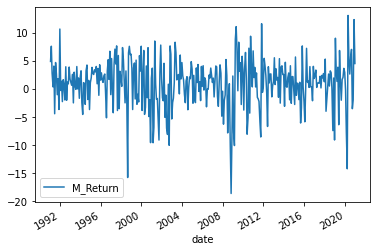

In [ ]:
mkt_ret.plot()

In [ ]:
port_mat = port_matrix.drop(["RF"], axis = 1 )
port_mat

,E_Return,Mkt_RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,,
1991-01,7.105407,4.69,3.86,-1.74,1.56,-4.08,-6.55
1991-02,12.452211,7.19,3.97,-0.55,-0.25,-0.16,-4.75
1991-03,13.723679,2.65,3.85,-1.32,-0.37,-0.99,2.76
1991-04,4.031613,-0.28,0.32,1.48,0.52,0.71,-2.40
1991-05,4.958658,3.65,0.16,-0.57,2.10,-2.45,-0.09
...,...,...,...,...,...,...,...
2020-08,-1.079639,7.63,-0.94,-2.94,4.27,-1.44,0.51
2020-09,-0.585254,-3.63,0.07,-2.51,-1.15,-1.77,3.05
2020-10,-3.266605,-2.10,4.76,4.03,-0.60,-0.53,-3.03


In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
robustness = pd.DataFrame(columns=['is_rsq', 'is_mse', 'is_rmse','is_mape','blank','os_rsq','os_mse', 'os_rmse', 'os_mape'])
for i in range(9):

  train = port_matrix.iloc[i*36: (i+1)*36 - 1, :]
  y_fit = port_matrix.iloc[i*36: (i+1)*36 - 1, 0]
  x_fit = port_matrix.iloc[i*36: (i+1)*36 - 1, 1:]
  y_test = port_matrix.iloc[(i+1)*36:(i+2)*36 -1, 0]
  x_test = port_matrix.iloc[(i+1)*36:(i+2)*36 -1, 1:]

  # Fit model
  formula = "E_Return ~ Mkt_RF"
  m = sm.ols(formula, data=train).fit()

  # Training period predictions and errors
  y_fit_pred = m.predict(x_fit)
  mse_is = sklearn.metrics.mean_squared_error(y_fit, y_fit_pred)
  rmse_is = sklearn.metrics.mean_squared_error(y_fit, y_fit_pred, squared=False)
  r_2_is = sklearn.metrics.r2_score(y_fit, y_fit_pred)
  mape_is = mean_absolute_percentage_error(y_fit, y_fit_pred)

  # Test period predictions and errors
  y_pred = m.predict(x_test)
  r_2 = sklearn.metrics.r2_score(y_test,y_pred)
  mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
  rmse = sklearn.metrics.mean_squared_error(y_test,y_pred, squared=False)
  mape = mean_absolute_percentage_error(y_test,y_pred)

  # Compiling results
  
  robustness.loc[i, ['is_rsq']] = r_2_is
  robustness.loc[i, ['os_rsq']] = r_2
  robustness.loc[i, ['is_mse']] = mse_is
  robustness.loc[i, ['os_mse']] = mse
  robustness.loc[i, ['is_rmse']] = rmse_is
  robustness.loc[i, ['os_rmse']] = rmse
  robustness.loc[i, ['os_mape']] = mape
  robustness.loc[i, ['is_mape']] = mape_is


In [ ]:
from google.colab import files

robustness.to_csv('robustness.csv')
files.download('robustness.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>